In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
for col in data.columns:
    if data.dtypes[col] == 'object':
        print('Col: {} - type {} - unique values: {}'.format(col,data.dtypes[col],data[col].unique()))

Col: customerID - type object - unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Col: gender - type object - unique values: ['Female' 'Male']
Col: Partner - type object - unique values: ['Yes' 'No']
Col: Dependents - type object - unique values: ['No' 'Yes']
Col: PhoneService - type object - unique values: ['No' 'Yes']
Col: MultipleLines - type object - unique values: ['No phone service' 'No' 'Yes']
Col: InternetService - type object - unique values: ['DSL' 'Fiber optic' 'No']
Col: OnlineSecurity - type object - unique values: ['No' 'Yes' 'No internet service']
Col: OnlineBackup - type object - unique values: ['Yes' 'No' 'No internet service']
Col: DeviceProtection - type object - unique values: ['No' 'Yes' 'No internet service']
Col: TechSupport - type object - unique values: ['No' 'Yes' 'No internet service']
Col: StreamingTV - type object - unique values: ['No' 'Yes' 'No internet service']
Col: StreamingMovies - type object - unique

In [7]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')

In [8]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data[data.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
data.drop(columns='customerID',inplace=True)

In [13]:
def categoriesFeatures(data):
    for col in data.columns:
        if data.dtypes[col] == 'object':
            print('Col: {} - Values: {}'.format(col, data[col].unique()))

In [14]:
categoriesFeatures(data)

Col: gender - Values: ['Female' 'Male']
Col: Partner - Values: ['Yes' 'No']
Col: Dependents - Values: ['No' 'Yes']
Col: PhoneService - Values: ['No' 'Yes']
Col: MultipleLines - Values: ['No phone service' 'No' 'Yes']
Col: InternetService - Values: ['DSL' 'Fiber optic' 'No']
Col: OnlineSecurity - Values: ['No' 'Yes' 'No internet service']
Col: OnlineBackup - Values: ['Yes' 'No' 'No internet service']
Col: DeviceProtection - Values: ['No' 'Yes' 'No internet service']
Col: TechSupport - Values: ['No' 'Yes' 'No internet service']
Col: StreamingTV - Values: ['No' 'Yes' 'No internet service']
Col: StreamingMovies - Values: ['No' 'Yes' 'No internet service']
Col: Contract - Values: ['Month-to-month' 'One year' 'Two year']
Col: PaperlessBilling - Values: ['Yes' 'No']
Col: PaymentMethod - Values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Col: Churn - Values: ['No' 'Yes']


In [15]:
data.PaymentMethod = data.PaymentMethod.apply(lambda x: x.replace(' (automatic)',''))

In [16]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [17]:
categoriesFeatures(data)

Col: gender - Values: ['Female' 'Male']
Col: Partner - Values: ['Yes' 'No']
Col: Dependents - Values: ['No' 'Yes']
Col: PhoneService - Values: ['No' 'Yes']
Col: MultipleLines - Values: ['No' 'Yes']
Col: InternetService - Values: ['DSL' 'Fiber optic' 'No']
Col: OnlineSecurity - Values: ['No' 'Yes']
Col: OnlineBackup - Values: ['Yes' 'No']
Col: DeviceProtection - Values: ['No' 'Yes']
Col: TechSupport - Values: ['No' 'Yes']
Col: StreamingTV - Values: ['No' 'Yes']
Col: StreamingMovies - Values: ['No' 'Yes']
Col: Contract - Values: ['Month-to-month' 'One year' 'Two year']
Col: PaperlessBilling - Values: ['Yes' 'No']
Col: PaymentMethod - Values: ['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']
Col: Churn - Values: ['No' 'Yes']


In [19]:
def countplot_of_a_feature(col,title):
    plt.figure(figsize=(12,6))
    ax = sns.countplot(data=data, x=col, hue='Churn', palette='pastel')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Proportion of observation')
    for p in ax.patches:
            ax.annotate('%{:.1f}'.format(100*p.get_height()/len(data)), (p.get_x()+0.3, p.get_height()+50))

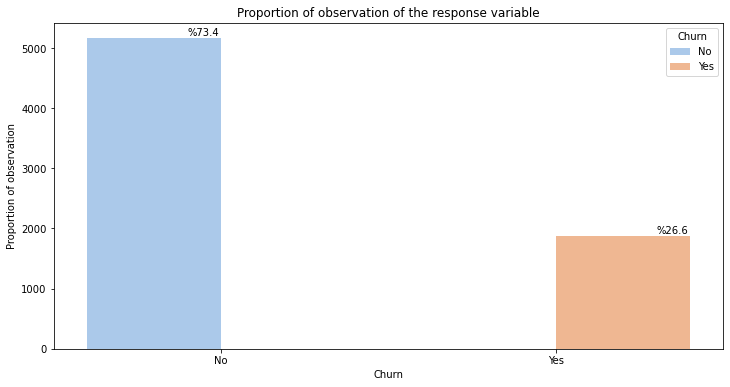

In [20]:
countplot_of_a_feature('Churn','Proportion of observation of the response variable')

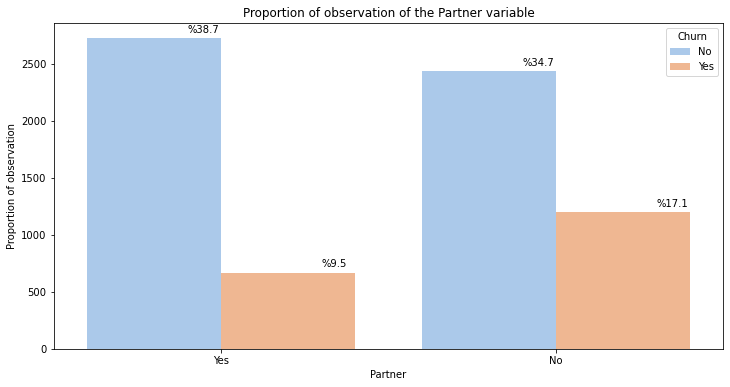

In [21]:
countplot_of_a_feature('Partner','Proportion of observation of the Partner variable')

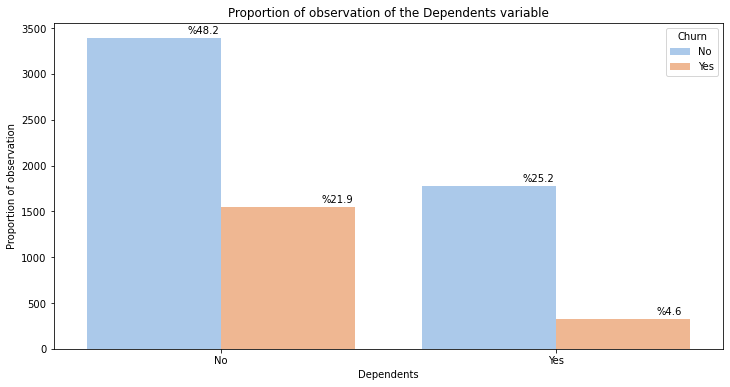

In [22]:
countplot_of_a_feature('Dependents','Proportion of observation of the Dependents variable')

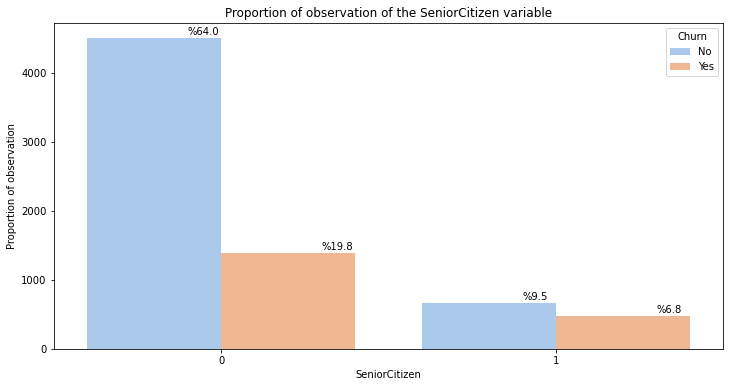

In [30]:
countplot_of_a_feature('SeniorCitizen','Proportion of observation of the SeniorCitizen variable')

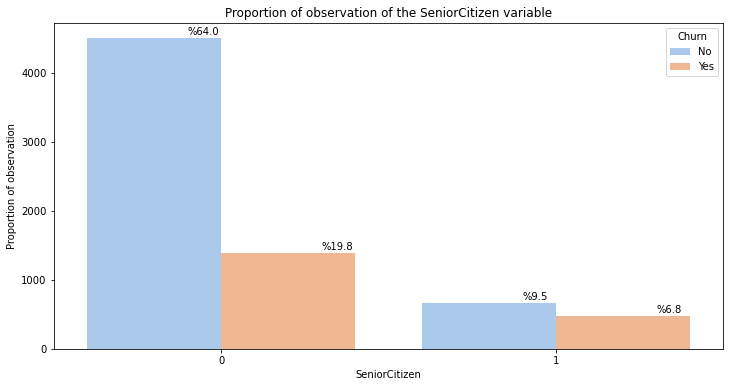

In [33]:
countplot_of_a_feature('SeniorCitizen','Proportion of observation of the SeniorCitizen variable')

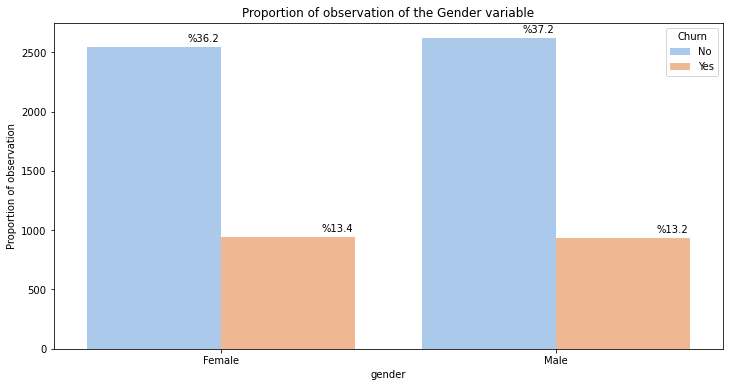

In [34]:
countplot_of_a_feature('gender','Proportion of observation of the Gender variable')

In [23]:
def pieplot_of_a_Feature(col,labels,title):
    plt.figure(figsize=(12,6))
    colors = sns.color_palette('pastel')[0:2]
    plt.pie(data[col].value_counts()*100/len(data),labels=labels,colors=colors,autopct='%.1f%%')
    plt.title(title)
    plt.show()

In [26]:
services = ['PhoneService',
            'MultipleLines',
            'InternetService',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies'
           ]

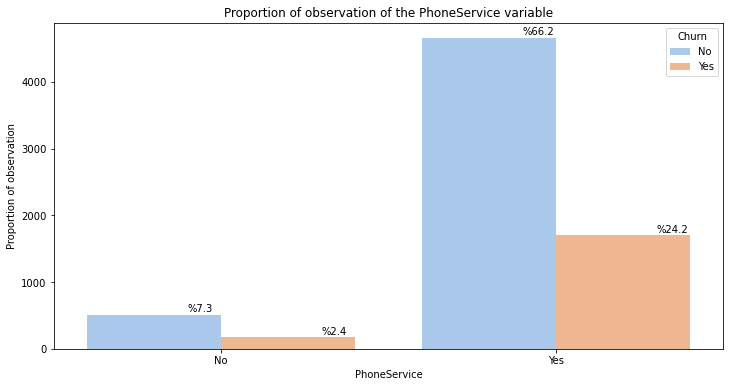

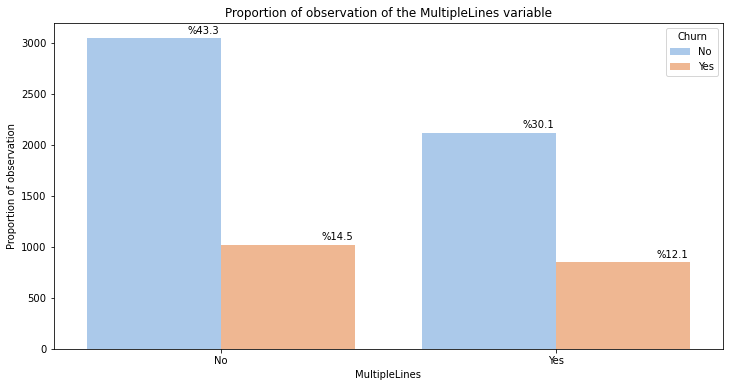

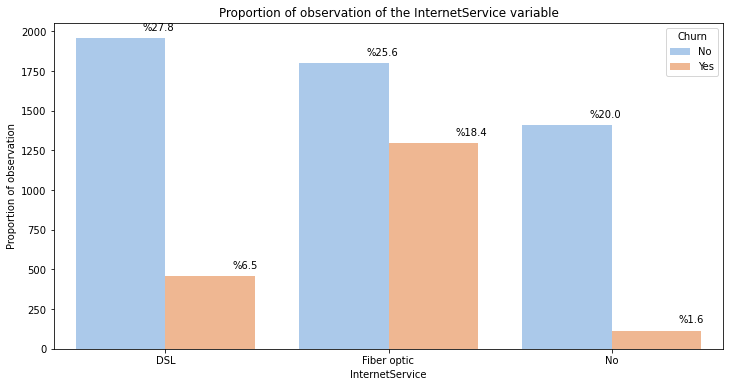

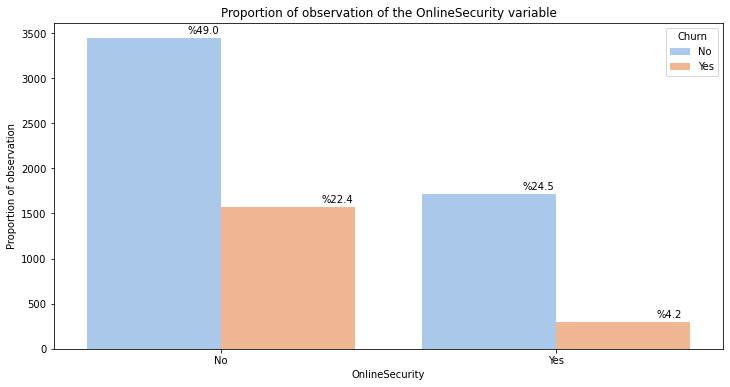

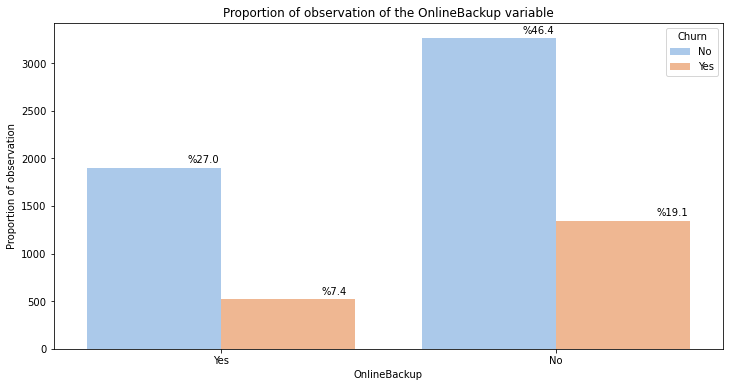

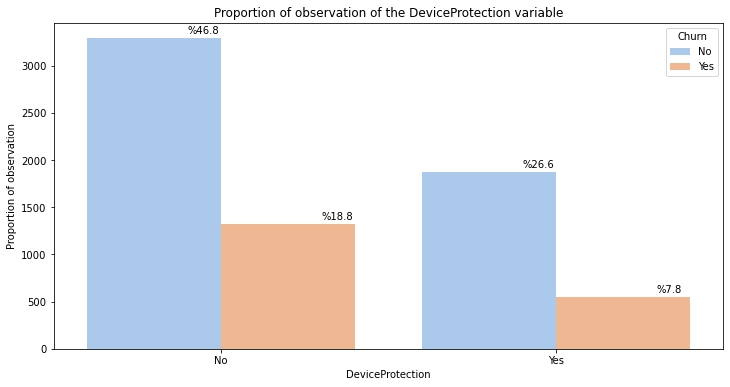

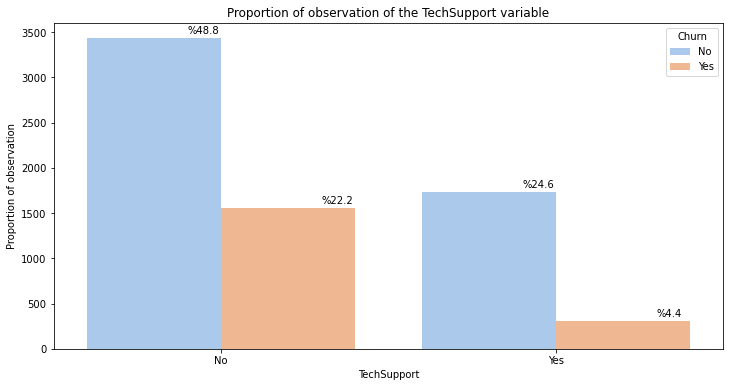

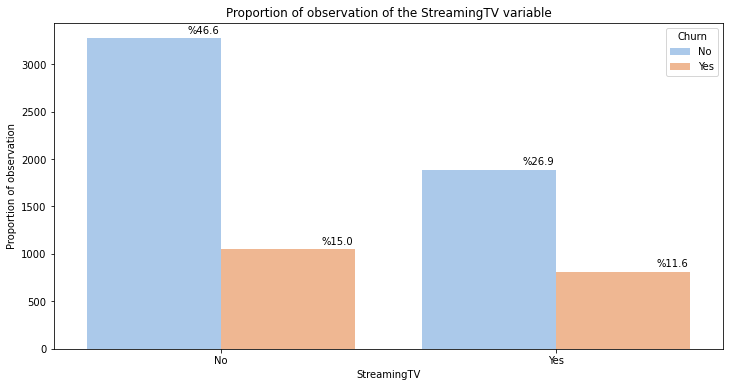

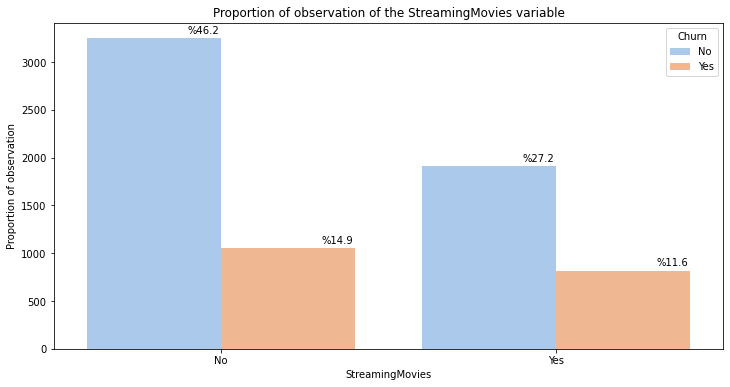

In [28]:
for service in services:
    countplot_of_a_feature(service,'Proportion of observation of the '+ service +' variable')

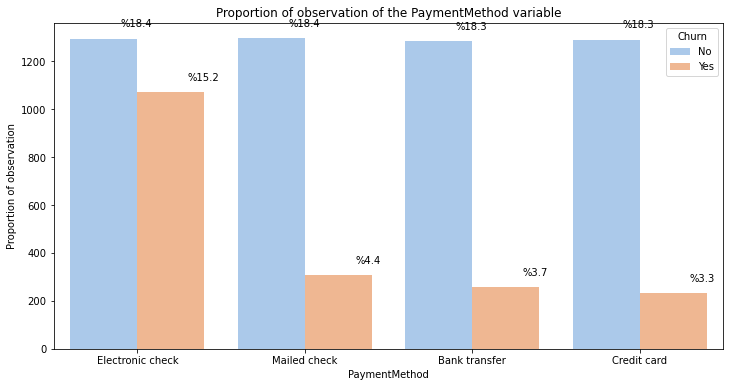

In [29]:
countplot_of_a_feature('PaymentMethod','Proportion of observation of the PaymentMethod variable')

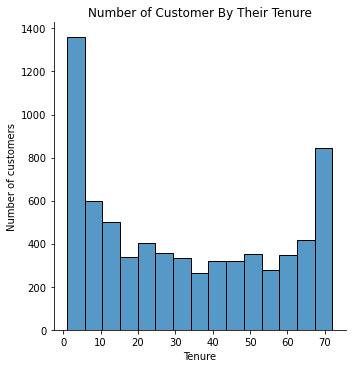

In [102]:
sns.displot(data=data,x='tenure')
plt.title('Number of Customer By Their Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.show()

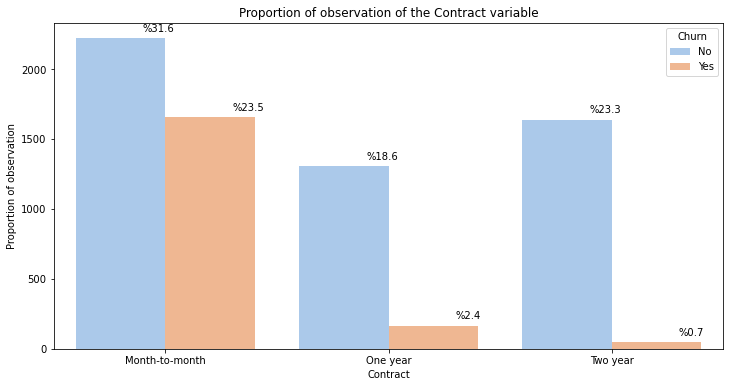

In [35]:
countplot_of_a_feature('Contract','Proportion of observation of the Contract variable')